In [10]:
# Import required libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)
# print(plt.style.available)  # List available styles

# Configure plot style
plt.style.use('seaborn-v0_8-white')
sns.set_theme(style="whitegrid")


In [11]:
# Download Tesla stock data
ticker = "TSLA"
start_date = "2019-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

# Get data from Yahoo Finance
tesla_data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows and basic information
print("Dataset Shape:", tesla_data.shape)
print("\nFirst few rows of the dataset:")
tesla_data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Dataset Shape: (1616, 5)

First few rows of the dataset:


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500


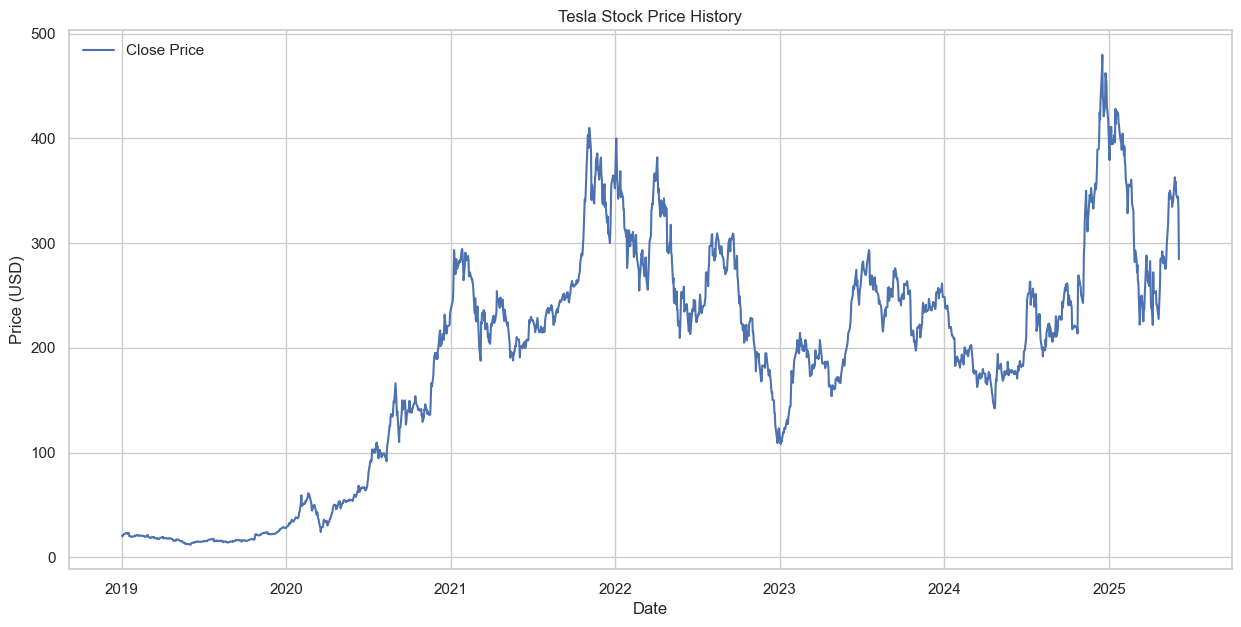

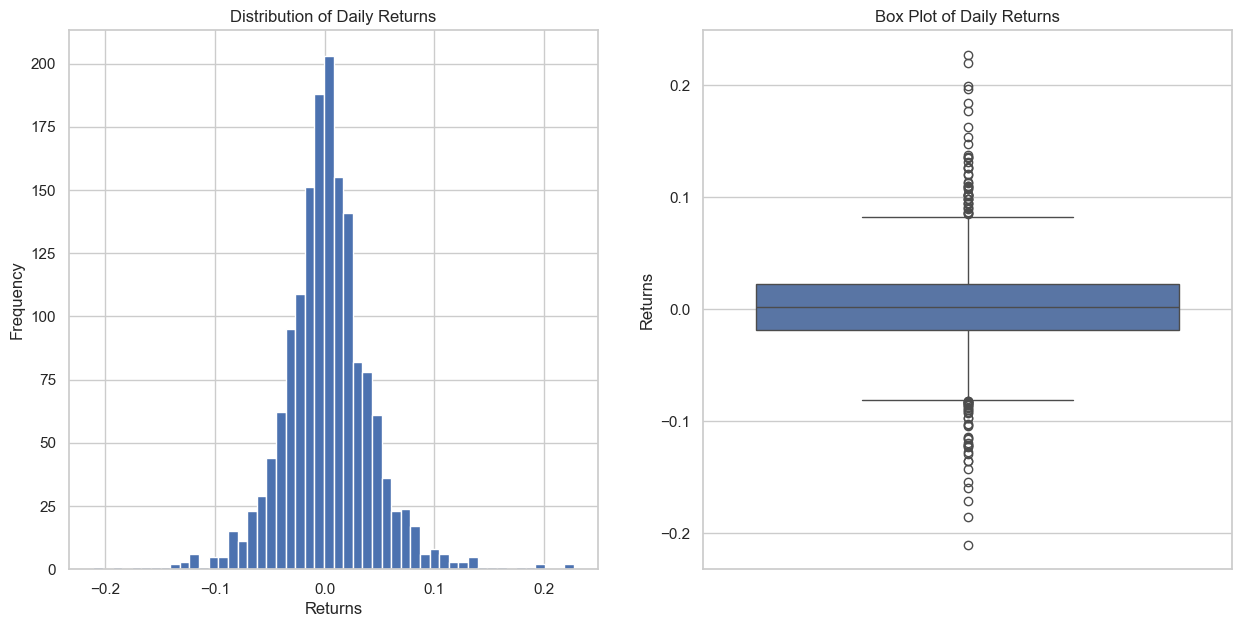

In [12]:
# Visualize Tesla stock price history
plt.figure(figsize=(15, 7))
plt.plot(tesla_data.index, tesla_data['Close'], label='Close Price')
plt.title('Tesla Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate daily returns
tesla_data['Returns'] = tesla_data['Close'].pct_change()

# Plot daily returns distribution
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
tesla_data['Returns'].hist(bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=tesla_data['Returns'])
plt.title('Box Plot of Daily Returns')
plt.ylabel('Returns')
plt.show()


In [13]:
# Select features for the model
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = tesla_data[features].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 3])  # 3 is the index for Close price
    return np.array(X), np.array(y)

# Parameters
sequence_length = 60  # Number of time steps to look back

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split the data into train, validation, and test sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size+val_size]
y_val = y[train_size:train_size+val_size]

X_test = X[train_size+val_size:]
y_test = y[train_size+val_size:]

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (1089, 60, 5) (1089,)
Validation set shape: (233, 60, 5) (233,)
Test set shape: (234, 60, 5) (234,)
